In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [272]:
df = pd.read_csv('../Dataset/Salary_Data.csv')
df.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [273]:
df.shape

(30, 2)

In [274]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [275]:
X = df.drop(['Salary'], axis = 1)
y = df['Salary']

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [277]:
class SimpleLinearRegression:
    def __init__(self):
        self.w = np.random.rand(1,1)
        self.b = np.random.rand(1)
        
    def partial_derivative(self, f, w, b):
        h = 0.0001
        return (f(w + h, b) - f(w - h, b))/(2*h), (f(w, b + h) - f(w, b - h))/(2*h)
    
    def fit(self, X, y):
        epoch=2000
        learning_rate=0.01
        fx = lambda w,b: np.sum(((np.dot(X, w)+b)-y.values.reshape((y.shape[0], -1)))**2)/len(X)
        ws = []
        bs = []
        
        for i in range(1, epoch+1):
            w_loss, b_loss = self.partial_derivative(fx, self.w, self.b)
            self.w -= learning_rate * w_loss
            self.b -= learning_rate * b_loss
            ws.append(self.w[0][0])
            bs.append(self.b[0])
            
        return ws, bs
    
    def predict(self, X):
        return np.dot(X, self.w)+self.b

In [278]:
lg = SimpleLinearRegression()

In [279]:
ws, bs = lg.fit(X_train, y_train)

In [280]:
lg.predict(X_test)

array([[ 64027.29054481],
       [ 93383.95347924],
       [123687.60554059],
       [ 72550.19268706],
       [ 90542.98609849],
       [111376.74689067]])

In [281]:
y_test

11     55794.0
21     98273.0
28    122391.0
15     67938.0
20     91738.0
25    105582.0
Name: Salary, dtype: float64

In [282]:
import matplotlib.pyplot as plt

## Training Set

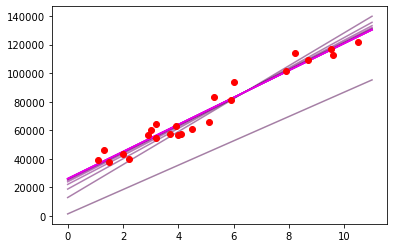

In [283]:
x = range(12)

for i in range(0, 2000, 125):
    y = [ws[i]*v+bs[i] for v in x]
    plt.plot(x, y, color=(0.7*i/2000 + 0.3, 0, 0.7*i/2000 + 0.3, 0.5))

plt.plot(X_train, y_train, 'ro')

plt.show()

## Test Set

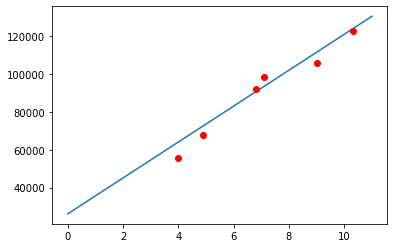

In [284]:
x = range(12)
y = [lg.w[0][0]*v+lg.b[0] for v in x]
plt.plot(x, y)

plt.plot(X_test, y_test, 'ro')